<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Control-Sample" data-toc-modified-id="Load-Control-Sample-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Control Sample</a></span></li><li><span><a href="#Run-ESASky" data-toc-modified-id="Run-ESASky-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Run ESASky</a></span></li><li><span><a href="#Construct-Data-Sample" data-toc-modified-id="Construct-Data-Sample-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Construct Data Sample</a></span></li><li><span><a href="#Visual-Inspection" data-toc-modified-id="Visual-Inspection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visual Inspection</a></span></li><li><span><a href="#Clustering-Analysis" data-toc-modified-id="Clustering-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Clustering Analysis</a></span></li><li><span><a href="#Compare-to-Control" data-toc-modified-id="Compare-to-Control-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare to Control</a></span></li><li><span><a href="#Save-HDBSCAN-slected-Output" data-toc-modified-id="Save-HDBSCAN-slected-Output-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Save HDBSCAN slected Output</a></span></li></ul></div>

In [1]:
# Python Basics ========================
import warnings, sys
warnings.filterwarnings('ignore', category=UserWarning)
sys.path.append('../library/')

# Custom ===============================
from lib_utils       import LibUtils       as Utils
from lib_gaia_query  import LibGaiaQuery   as GaiaQuery
from lib_interactive import LibInteractive as Interactive
from lib_cluster     import LibCluster     as Cluster
from lib_plotters    import LibPlotters    as Plotters
from lib_compare     import LibCompare     as Compare

# PyEsasKy =============================
from pyesasky.pyesasky import ESASkyWidget

# Adjust cell size =====================
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>")) ## Adjust cell size as you wish. Default is 90% of the screen size.

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
# SetUp Analysis Steps =================================
step_1 = True # Load Control Sample
step_2 = True # ESASky Plot
step_3 = True # Interactive/Dynamical Gaia Data exploration
step_4 = True # Clustering

# Load Control Sample

Sample Catalogues in ../samples_control/: ==============================================

* sample_control_IC_348.vot
* sample_control_NGC_1333.vot

Choose Control Sample: sample_control_IC_348.vot
Sample Control loaded. N_elements (rows) = 144

Checking catalogue columns (ra, dec, parallax, pmra, phot_g_mean_mag, etc) - OK

Showing Sample Control first 5 rows:


col2mass,source_id,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,pmdec_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,phot_g_mean_flux_over_error,phot_bp_mean_flux_over_error,phot_rp_mean_flux_over_error,l,b,visibility_periods_used,radial_velocity,unit_weight_e,ruwe,distance,phot_g_mean_mag_abs,phot_bp_mean_mag_abs,phot_rp_mean_mag_abs,phot_g_mean_mag_err,phot_bp_mean_mag_err,phot_rp_mean_mag_err,X_gal,Y_gal,Z_gal,pm_mod
,,deg,deg,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,mag,mag,mag,,,,deg,deg,,km / s,,,pc,mag,mag,mag,mag,mag,mag,pc,pc,pc,
bytes16,int64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,int16,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float64,float64,float64,float64
03430679+3148204,216575791780899200,55.77832585931487,31.805676998022935,3.368292212211576,0.18569575746121944,4.153055103839073,0.24327365471569765,-7.238032874307061,0.1874717775215194,16.336063,18.711496,14.907626,627.83307,41.59013,198.40709,160.48133628908516,-18.274279107720577,9,--,1.8418794652984396,1.078421,296.8863557545719,8.973112190843308,11.348545158982956,7.544674957872116,0.0015927801,0.024044167,0.0050401427,-265.71249557733364,94.19114879201432,-93.09353047627064,8.344877865198118
03432622+3159286,216673162984386944,55.859323289998294,31.99127822034385,2.632751869978748,0.2504633438776319,4.608158705333078,0.4623583068436142,-6.940869193945712,0.2801396522260879,18.188923,20.33305,16.75615,508.76843,14.258361,157.91954,160.41233815127958,-18.08751919003965,9,--,1.1610862156055872,0.96449953,379.8307054314511,10.290972531622979,12.435099423712822,8.858198941535088,0.0019655307,0.07013429,0.006332339,-340.1660512901451,121.04514881599239,-117.92579991816214,8.331313931247678
03432774+3208314,216692099496268288,55.86564895264847,32.142068755211675,3.315366603457813,0.20983146461589036,4.584408968543563,0.43174948098974925,-7.2091046805227315,0.24425233421779075,17.565023,19.63398,16.151264,601.43933,24.294651,176.66731,160.31545184985518,-17.968026007948183,8,--,1.1918276439315283,0.94958436,301.6257686124468,10.167681214234388,12.236637589356459,8.753921982667006,0.0016626781,0.041161325,0.0056603565,-270.1482103718381,96.64487582456944,-93.04738954315665,8.543301228775526
03433205+3206172,216685949103101824,55.88362722579706,32.104790681581335,2.9996222049239414,0.05954141609718637,3.555695459980017,0.1183264543616157,-6.921575941462564,0.06722023993853171,14.828465,15.982068,13.762056,661.0584,126.30815,243.22202,160.35279023811825,-17.987003245808655,8,--,1.2506929608546613,1.0847275,333.375315850936,7.213798260914656,8.367400861012312,6.147389149891707,0.0015127256,0.007917145,0.0041114697,-298.6218375242565,106.61178748238133,-102.94671506249932,7.78146411143532
03433365+3201451,216673678380015232,55.89025861343185,32.029207864923364,3.2290728529141717,0.1792326043703605,4.7918714236640385,0.325847169733034,-7.534572612363947,0.20241032929788338,17.243881,--,--,416.147,--,--,160.40809188995905,-18.0415794082769,9,--,1.399380613109474,1.3609223,309.68641636484625,9.78927044302494,--,--,0.002402997,--,--,-277.4119577216782,98.73781033456953,-95.91207955341868,8.929267393908242


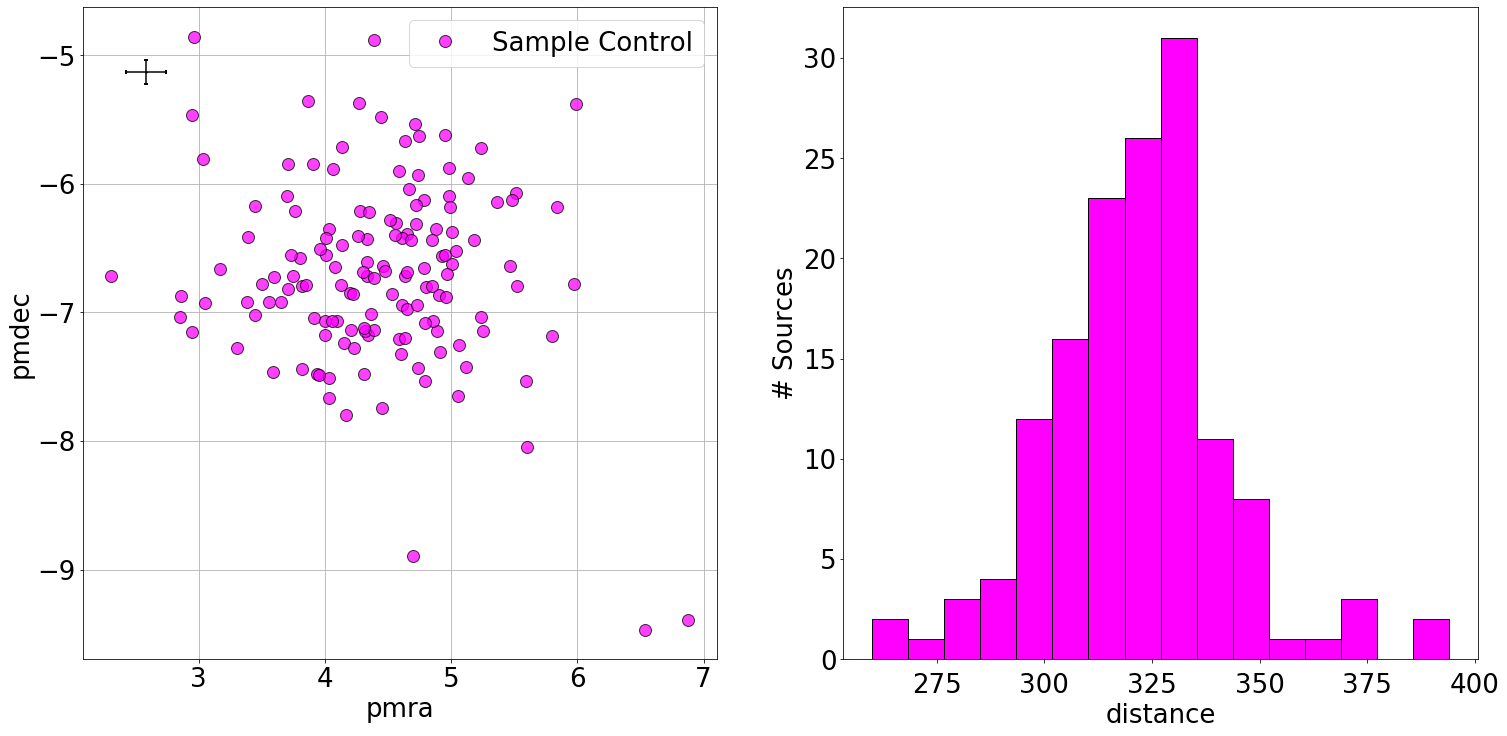

In [5]:
# Load Control Sample ==================================
if step_1:
    control = Utils(color = 'magenta', label = 'Sample Control')
    control.read_catalogue(sample_dir = '../samples_control/')

    print()
    print(f'Showing {control.label} first 5 rows:')
    display(control.cat[0:5])

    # Examine Velocity & Histograms ====================
    figures  = Plotters()
    figures.load_gaia_cat(control.cat)
    figures.plot_2d_and_hist(col_hist = 'distance', label = control.label,
                             color_2d = control.color, color_hist = control.color, mew = 1)    

# Run ESASky

In [ ]:
# Run ESASKY ===========================================
if step_2:
    esasky = ESASkyWidget()
    display(esasky)

In [ ]:
# Show Control Sample in ESASky ========================
if step_1 and step_2:
    figures_0  = Plotters()
    figures_0.load_gaia_cat(control.cat)
    figures_0.send_to_ESASky(esasky, background='WISE', color=control.color, catalogueName = control.label)

# Construct Data Sample

In [ ]:
# Create Gaia Sample ===================================
sample_queried = GaiaQuery()
if step_1:
    control.print_cone_properties()
    ra  = control.ADQL_pars['ra'].value
    dec = control.ADQL_pars['dec'].value
    sample_queried.set_cone_search_pars(ra = ra, dec = dec)
else:
    sample_queried.set_cone_search_pars()
sample_queried.run_cone_search(quality_par_SN  = '10', quality_par_vis = '7',quality_par_ruwe = '1.40')

print()
sample_gaia = Utils(color = 'grey', label = sample_queried.sample_name)
sample_gaia.read_catalogue(sample_queried.cat, save_sample = True, print_vrad = True)

print('Showing first 5 rows of Analysis Sample')
display(sample_gaia.cat[0:5])

In [ ]:
# Show output in ESASky ================================
if step_2:
    figures  = Plotters()
    figures.load_gaia_cat(sample_gaia.cat)
    figures.send_to_ESASky(esasky, background='WISE', color='white', radius = sample_gaia.ADQL_pars['radius'].value, catalogueName = 'Analysis Sample')

# Visual Inspection

In [ ]:
# Examine astrometry ===================================
if step_3:
    i_figures = Interactive()
    i_figures.load_gaia_cat(sample_gaia.cat)
    if step_1:
            i_figures.load_control_obj(control)
    i_figures.explore_and_select(opacity = 0.5, border_width = 1, color_def = 'black', color_high = 'cyan')
    display(i_figures.dashboard)

In [ ]:
# Show 3D distribution =================================
if step_2 and step_3:
    if hasattr(i_figures, 'cat_subsamp'):
        print('Plotting Subsample in ESASky')
        figures.add_catalogue_to_ESASky(esasky, i_figures.cat_subsamp, color='cyan', catalogueName='SubSamp', radius = sample_gaia.ADQL_pars['radius'].value)

if step_3:
    i_figures.show_3D_space(width = 1200, height=700, size = 5, color_def = 'black')
    display(i_figures.fig_3D)

# Clustering Analysis

In [ ]:
# Scale before clustering ==============================
if step_4:
    data_clustering = Cluster()
    data_clustering.read_data_obj(sample_gaia, scl_features = ['X_gal', 'Y_gal', 'Z_gal', 'pmdec', 'pmra'])

In [ ]:
# Run HDBSCAN through a range of min samples ===========
if step_4:
#     data_clustering.run_multi_hdbscan(verbose = True, show_plot = False, probability = 80, min_samples = 1)
    data_clustering.run_multi_hdbscan(verbose = True, show_plot = False)
    data_clustering.plot_multi_hdbscan_stats(fig_nm = 'default')

In [ ]:
# Show selected HDBSCAN results ========================
if step_4:
    data_clustering.run_hdbscan(probability = data_clustering.probability, min_samples=data_clustering.min_samples, verbose = True)
    data_clustering.plot_hdbscan_clusters(xlim_1=[-5,15], ylim_1 = [-17.5,2.5])
    if step_2:
        data_clustering.esasky_hdbscan_clusters(esasky, radius = sample_gaia.ADQL_pars['radius'].value)

# Compare to Control

In [ ]:
# Cluster Comparison ===================================
if step_1:
    comp = Compare()
    comp.read_control(control, mew = 2)
    comp.read_clusters(data_clustering, verbose = False)
    comp.compare_to_control(verbose = True)
    print()
    
    # Plot Comparison ======================================
    # Define plot XY ranges for panels 1 & 2
    xlim_1 = [sample_gaia.cat['ra'].min(),  sample_gaia.cat['ra'].max()]
    ylim_1 = [sample_gaia.cat['dec'].min(), sample_gaia.cat['dec'].max()]
    xlim_2 = [0.0, 10.0]
    ylim_2 = [-12.5, -2.5]

    comp.plot_clusters_comp(markersize = 16, xlim_1 = xlim_1, ylim_1 = ylim_1, xlim_2 = xlim_2, ylim_2 = ylim_2, fig_nm = 'default')

# Save HDBSCAN slected Output

In [ ]:
if step_4:
    data_clustering.save_cluster()